# Тестовое задание - Devim

В архиве во вложении данные по выдачам кредитов и платежам: плановым и фактическим. Данные актуальны на 08.12.2022. Проанализируйте характер поведения клиентов с точки зрения просрочки: какая динамика просрочки, наблюдается ли рост или снижение?

- order_id – номер заявки
- created_at - дата создания заявки
- put_at - дата выдачи
- closed_at - дата закрытия
- issued_sum - сумма выдачи
- plan_at - дата планового платежа
- plan_sum_total - сумма планового платежа (накопленным итогом)
- paid_at - дата фактического платежа
- paid_sum - сумма фактического платежа


In [2]:
# ячейка для иморта бииблитек
import pandas as pd
import seaborn as sns

In [3]:
# загружаем данные
orders = pd.read_csv(r'C:\Users\USER\Desktop\Программирование\Тестовые задания\11.03.2025\orders.csv')
orders.head(10)

,order_id,created_at,put_at,closed_at,issued_sum
0,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0
1,400005838,2022-06-02 00:10:22.997,2022-06-02 15:41:33.267,2022-06-02 17:38:43.917,20000.0
2,400007915,2022-06-02 00:18:04.000,2022-06-05 19:17:38.547,2022-06-21 21:55:51.877,5820.0
3,400008952,2022-06-02 00:22:07.000,2022-06-03 14:25:18.033,2022-07-12 10:47:46.307,9000.0
4,400009027,2022-06-02 00:25:39.000,2022-06-02 00:40:40.320,2022-06-22 14:15:07.423,5000.0
5,400010534,2022-06-02 00:46:35.000,2022-06-02 11:42:04.560,2022-07-14 22:15:19.217,14600.0
6,400013633,2022-06-02 00:46:38.000,2022-06-02 00:47:46.277,2022-06-16 03:15:48.960,9500.0
7,400014289,2022-06-02 01:12:32.000,2022-06-02 01:14:07.683,2022-06-06 15:04:37.347,10000.0
8,400014330,2022-06-02 01:13:39.997,2022-06-02 10:56:18.277,2022-06-13 12:16:33.123,5430.0
9,400014464,2022-06-02 01:17:28.000,2022-06-02 01:22:27.323,2022-06-06 16:29:00.720,3000.0


In [4]:
payments = pd.read_csv(r'C:\Users\USER\Desktop\Программирование\Тестовые задания\11.03.2025\payments.csv')
payments.head(10)

,order_id,paid_at,paid_sum
0,400013633,2022-06-02 00:48:13.800,2500.0
1,400018480,2022-06-02 01:52:05.707,1070.0
2,400032001,2022-06-02 04:55:40.307,4200.0
3,400033195,2022-06-02 05:44:23.480,2850.0
4,400039407,2022-06-02 06:53:54.503,10100.0
5,400116494,2022-06-02 08:09:42.393,4200.0
6,400138751,2022-06-02 09:39:18.877,11110.0
7,400224041,2022-06-02 10:33:26.510,3570.0
8,400020168,2022-06-02 10:39:36.157,4200.0
9,400024960,2022-06-02 10:40:25.193,2500.0


In [5]:
plan = pd.read_csv(r'C:\Users\USER\Desktop\Программирование\Тестовые задания\11.03.2025\plan.csv')
plan.head(10)

,order_id,plan_at,plan_sum_total
0,400001732,2022-06-02,5600.0
1,400001732,2022-07-02,9450.0
2,400001732,2022-08-01,12170.0
3,400001732,2022-08-31,14890.0
4,400001732,2022-09-30,17610.0
5,400001732,2022-10-30,20330.0
6,400001732,2022-11-29,23050.0
7,400005838,2022-06-17,23000.0
8,400007915,2022-06-05,1820.0
9,400007915,2022-06-20,2730.0


Итак, данные загружены. Надо начинать анализ

In [6]:
# смотрим на полноту данных
print(orders.info())
print(plan.info())
print(payments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55748 entries, 0 to 55747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    55748 non-null  int64  
 1   created_at  55748 non-null  object 
 2   put_at      55748 non-null  object 
 3   closed_at   46472 non-null  object 
 4   issued_sum  55748 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420282 entries, 0 to 420281
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        420282 non-null  int64  
 1   plan_at         420282 non-null  object 
 2   plan_sum_total  420282 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143284 entries, 0 to 143283
Data columns (total 3 columns):
 #   Column    Non-Nu

1-ое наблюдение - не хватает более 9 тысяч значений в столбце closed_at (дата закрытия) - а это значит, не закрыто более 9 тысяч кредитов. Далее все типы данных приведены в виде строки с датой и временем. Тут 2 момента: надо привести к типу дата, и во-вторых бесполезно в данном случае время. Это во всех столбцах.

In [7]:
orders.query('closed_at.isna()').head(10)

,order_id,created_at,put_at,closed_at,issued_sum
31,400039450,2022-06-02 06:06:20.000,2022-06-02 17:04:46.147,NaN,8140.0
53,400087077,2022-06-02 06:49:06.997,2022-06-02 06:50:21.053,NaN,2920.0
62,400104071,2022-06-02 07:24:24.000,2022-06-02 07:40:44.230,NaN,1720.0
67,400114009,2022-06-02 07:46:38.000,2022-06-02 07:54:54.360,NaN,13600.0
80,400128637,2022-06-02 08:37:15.000,2022-06-02 08:56:56.887,NaN,8500.0
95,400161627,2022-06-02 09:17:38.000,2022-06-02 09:19:59.230,NaN,11680.0
103,400173126,2022-06-02 09:23:55.997,2022-06-02 09:25:26.067,NaN,11680.0
107,400184670,2022-06-02 09:28:52.000,2022-06-02 09:37:22.253,NaN,2720.0
109,400187495,2022-06-02 09:30:21.997,2022-06-05 17:49:46.780,NaN,14600.0
117,400199918,2022-06-02 09:40:26.000,2022-06-02 09:57:43.967,NaN,1720.0


In [8]:
orders['created_at'] = pd.to_datetime(orders['created_at'],format='ISO8601').dt.date
orders['put_at'] = pd.to_datetime(orders['put_at'],format='ISO8601').dt.date
orders['closed_at'] = pd.to_datetime(orders['closed_at'],format='ISO8601').dt.date
print(orders.info())
display(orders.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55748 entries, 0 to 55747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    55748 non-null  int64  
 1   created_at  55748 non-null  object 
 2   put_at      55748 non-null  object 
 3   closed_at   46472 non-null  object 
 4   issued_sum  55748 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB
None


,order_id,created_at,put_at,closed_at,issued_sum
0,400001732,2022-06-02,2022-06-02,2022-10-17,13600.0
1,400005838,2022-06-02,2022-06-02,2022-06-02,20000.0
2,400007915,2022-06-02,2022-06-05,2022-06-21,5820.0
3,400008952,2022-06-02,2022-06-03,2022-07-12,9000.0
4,400009027,2022-06-02,2022-06-02,2022-06-22,5000.0
5,400010534,2022-06-02,2022-06-02,2022-07-14,14600.0
6,400013633,2022-06-02,2022-06-02,2022-06-16,9500.0
7,400014289,2022-06-02,2022-06-02,2022-06-06,10000.0
8,400014330,2022-06-02,2022-06-02,2022-06-13,5430.0
9,400014464,2022-06-02,2022-06-02,2022-06-06,3000.0


In [9]:
# проделаем это и со второй таблицей
payments['paid_at'] = pd.to_datetime(payments['paid_at'],format='ISO8601').dt.date
print(payments.info())
display(payments.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143284 entries, 0 to 143283
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   order_id  143284 non-null  int64  
 1   paid_at   143284 non-null  object 
 2   paid_sum  143284 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB
None


,order_id,paid_at,paid_sum
0,400013633,2022-06-02,2500.0
1,400018480,2022-06-02,1070.0
2,400032001,2022-06-02,4200.0
3,400033195,2022-06-02,2850.0
4,400039407,2022-06-02,10100.0
5,400116494,2022-06-02,4200.0
6,400138751,2022-06-02,11110.0
7,400224041,2022-06-02,3570.0
8,400020168,2022-06-02,4200.0
9,400024960,2022-06-02,2500.0


Даты в таблицах очищены.

In [10]:
# проверка на уникальность значений
len(orders.order_id.unique())

55748

Все значения уникальны. Дубликатов нет. Теперь посчитаем сколько выдано кредитов по месяцам.

Надо изменить тип всех значений на целочисленный тип - выдача кредитов тут происходила до целого числа условных единиц. И привести тип значений к типу дата, а не объект (строка).

In [11]:
orders['issued_sum'] = orders['issued_sum'].astype('int64')
payments['paid_sum'] = payments['paid_sum'].astype('int64')
plan['plan_sum_total'] = plan['plan_sum_total'].astype('int64')
orders['created_at'] = pd.to_datetime(orders['created_at'],format='%Y-%m-%d')
orders['put_at'] = pd.to_datetime(orders['put_at'],format='%Y-%m-%d')
orders['closed_at'] = pd.to_datetime(orders['closed_at'],format='%Y-%m-%d')
payments['paid_at'] = pd.to_datetime(payments['paid_at'],format='%Y-%m-%d')
plan['plan_at'] = pd.to_datetime(plan['plan_at'],format='%Y-%m-%d')
display(orders.info())
display(payments.info())
display(plan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55748 entries, 0 to 55747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    55748 non-null  int64         
 1   created_at  55748 non-null  datetime64[ns]
 2   put_at      55748 non-null  datetime64[ns]
 3   closed_at   46472 non-null  datetime64[ns]
 4   issued_sum  55748 non-null  int64         
dtypes: datetime64[ns](3), int64(2)
memory usage: 2.1 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143284 entries, 0 to 143283
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   order_id  143284 non-null  int64         
 1   paid_at   143284 non-null  datetime64[ns]
 2   paid_sum  143284 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 3.3 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420282 entries, 0 to 420281
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        420282 non-null  int64         
 1   plan_at         420282 non-null  datetime64[ns]
 2   plan_sum_total  420282 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 9.6 MB


None

In [12]:
# выдано кредитов по датам
orders_by_date = orders.groupby('created_at').agg({'issued_sum': 'sum'})
# погашено кредитов по датам
closing_by_date = orders.groupby('closed_at').agg({'issued_sum': 'sum'})
display(orders_by_date)
display(closing_by_date)

,issued_sum
created_at,
2022-06-02,4665380
2022-06-03,5058850
2022-06-04,4029680
2022-06-05,3358450
2022-06-06,5744980
...,...
2022-08-27,4636620
2022-08-28,4475590
2022-08-29,4528960


,issued_sum
closed_at,
2022-06-02,80000
2022-06-03,225000
2022-06-04,250000
2022-06-05,324000
2022-06-06,453000
...,...
2022-12-04,290670
2022-12-05,559720
2022-12-06,470330


Итак, мы узнали что данные у нас только за 2022 год. И данные эти специфичны - по выдаче кредитов со 2 июня 2022 года по 31 августа 2022 года. А погашение кредитов со 2 июня 2022 года по 22 декабря 2022 года. Но для анализа нужно свести данные по месяцам - даже по дням это не удобно. И, конечно, визуализация в виде графиков нужна. Таблицы большие и не самые удобные в работе.

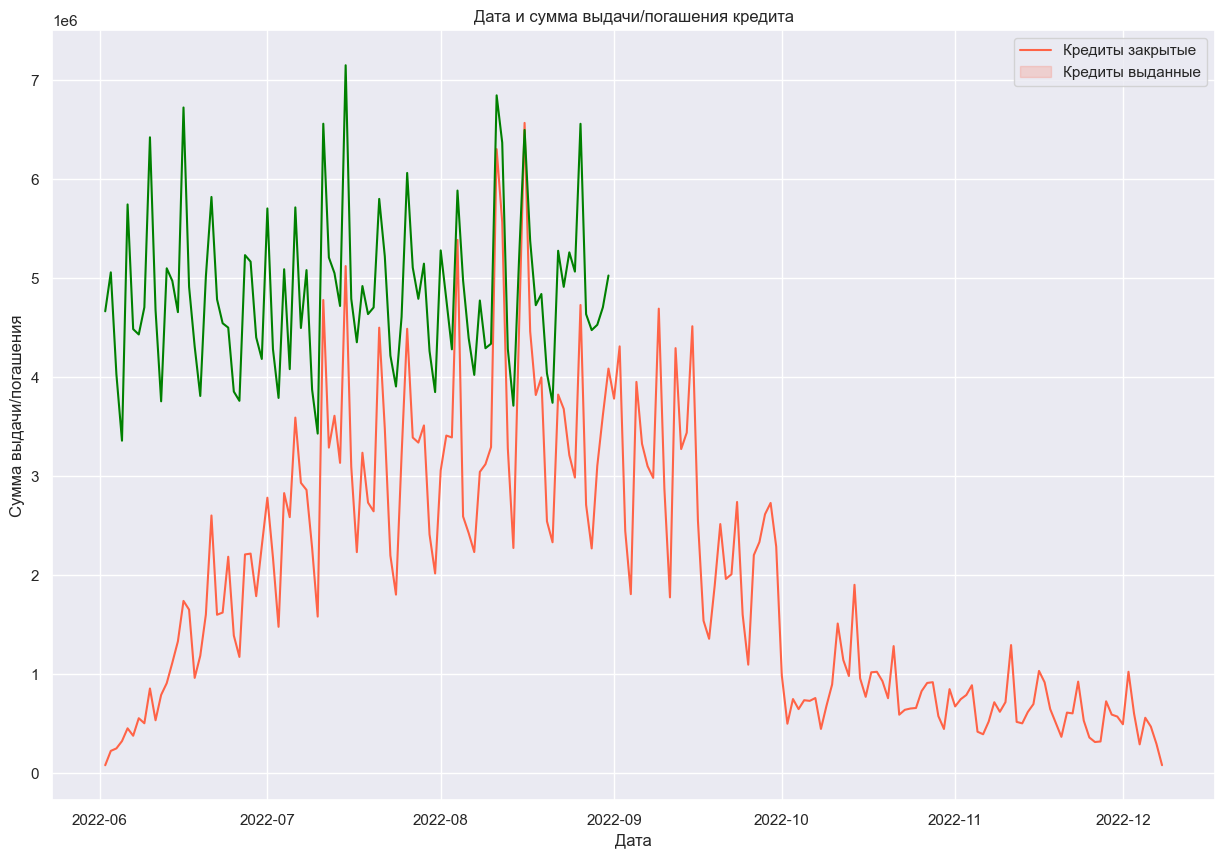

In [13]:
# проводим визулизацию результатов
sns.set(rc={'figure.figsize': (15,10)})
ax = sns.lineplot(closing_by_date, x = 'closed_at', y = 'issued_sum', color = 'tomato')
sns.lineplot(orders_by_date, x = 'created_at', y = 'issued_sum', color = 'green', ax = ax)
ax.legend(['Кредиты закрытые', 'Кредиты выданные'])
ax.set(xlabel='Дата', ylabel='Сумма выдачи/погашения', title='Дата и сумма выдачи/погашения кредита');

In [14]:
# находим общие суммы кредитов выданные, закрытые и разницу между ними
print(f'Сумма кредитов непогашенная: {orders.query("closed_at.isna()").issued_sum.sum()}')
print(f'Сумма кредитов погашенная: {orders.query("~closed_at.isna()").issued_sum.sum()}')
print(f'Сумма кредитов выданная: {orders.issued_sum.sum()}')

Сумма кредитов непогашенная: 69687430
Сумма кредитов погашенная: 371123270
Сумма кредитов выданная: 440810700


In [15]:
# вычисляем процент не закрытых кредитов
print('Процент не закрытых кредитов:', f'{orders.query("closed_at.isna()").issued_sum.sum() / orders.issued_sum.sum():.2%}')

Процент не закрытых кредитов: 15.81%


Теперь понятно, что не возвращено 15,81% суммы выданных кредитов на 8 декабря 2022 года. И раз выдача активная кредитов была фактически прекращена (или же у нас просто нет данных об этом) в конце августа, то там соответственно будет наибольшая сумма долга перед нашей организацией. Потом сумма кредитов не возвращённых будет уменьшаться.

Теперь рассчитаем сколько наша организация должна получить прибыли планово. И в сравнении с суммой кредитов выданных. И заодно можно будет понять к какой именно дате мы рассчитываем получить прибыль.

In [16]:
# сроки возврата кредитов
min_date = plan.plan_at.dt.date.min()
max_date = plan.plan_at.dt.date.max()
print('Срок возврата кредита с', min_date)
print('Срок окончания возрата кредитов', max_date)

Срок возврата кредита с 2022-06-02
Срок окончания возрата кредитов 2023-06-11


Таким образом мы узнали что срок возврата всех кредитов будет придположительно почти через год, ведь мы считаемчто у нас 08.12.2022, а полное погашение всех кредитов - до 11.06.2023. Следующий вопрос - сколько всего компания сможет на этом заработать?

In [17]:
# создаём новый датафрейм с датами от начальной до конечной.
data_range = pd.date_range(start=min_date, end=max_date, freq='D')
plan_fact_credit = pd.DataFrame(data_range, columns=['dates'])
# проверяем успешность создания нового фрейма
display(plan_fact_credit.head(10))

,dates
0,2022-06-02
1,2022-06-03
2,2022-06-04
3,2022-06-05
4,2022-06-06
5,2022-06-07
6,2022-06-08
7,2022-06-09
8,2022-06-10
9,2022-06-11


In [18]:
# посчитаем общую планируемую выручку для нашей организации
max_dates = plan.groupby('order_id')['plan_at'].max().reset_index()
merge_dates = pd.merge(max_dates, plan, on = ['order_id', 'plan_at'])
total_revenue = merge_dates['plan_sum_total'].sum()
print(f'Планируемая выручка с выдачи кредитов {total_revenue}')
display(merge_dates.head(10))

Планируемая выручка с выдачи кредитов 667235937


,order_id,plan_at,plan_sum_total
0,400001732,2022-11-29,23050
1,400005838,2022-06-17,23000
2,400007915,2022-12-02,8579
3,400008952,2022-06-18,12628
4,400009027,2022-06-17,6013
5,400010534,2022-11-29,23327
6,400013633,2022-11-21,13715
7,400014289,2022-06-17,11500
8,400014330,2022-11-21,7727
9,400014464,2022-06-17,3450


In [19]:
# считаем планируемую прибыль
print(f'Сумма планируемой прибыли: {total_revenue - orders.issued_sum.sum()}')
# планирунемая прибыль в %.
print(f'Планируемая прибыль - {(total_revenue - orders.issued_sum.sum()) / orders.issued_sum.sum():.2%}')

Сумма планируемой прибыли: 226425237
Планируемая прибыль - 51.37%


Итак, Сумма планируемой прибыли более 226 млн. (рублей?) к середине 2023 года. Прибыльность - более 50%. Т.е. планируется высокая прибыль к середине 2023 года. Но сколько собрали сейчас и сколько планировалось?

In [20]:
# посчитаем сколько по факту уже заплатили люди до текущей даты (08.12.2022).
total_payments = payments.paid_sum.sum()
print(f'Всего было платежей до 08.12.2022 - {total_payments} рублей')

Всего было платежей до 08.12.2022 - 559172785 рублей


In [21]:
# считаем чистую прибыль к 08.12.2022
current_revenue = total_payments - orders.issued_sum.sum()
# прибыль в % к 08.12.2022
current_revenue_in_persent = current_revenue / orders.issued_sum.sum()
print(f'Прибыль к 08.12.2022 - {current_revenue} рублей')
print(f'Прибыль к 08.12.2022 в % - {current_revenue_in_persent:.2%}')

Прибыль к 08.12.2022 - 118362085 рублей
Прибыль к 08.12.2022 в % - 26.85%


Мы имеем, что к текущему моменту наша организация заработала уже более 118 млн. рублей (после отбития текущих затрат). Заработатно в % от превоначальных затрат более 126%. Т.е. в худшем гипотетическом случае (если все оставшиеся кредиторы в одночасье станут банкротами) мы уже себя полностью застраховали и даже получили неплохую прибыль.

In [24]:
# Дополняем фактическими платежами по кредитам на даты
def fact_payments(date):
    curr_date = '08.12.2022'
    curr_date_df = pd.to_datetime(curr_date, format='%d.%m.%Y')
    if date <= curr_date_df:
        pay = payments[payments['paid_at'] <= date].paid_sum.sum()
        return pay

plan_fact_credit['fact'] = plan_fact_credit['dates'].apply(fact_payments)
display(plan_fact_credit.head(10))
display(plan_fact_credit.tail(10))

,dates,fact
0,2022-06-02,557960.0
1,2022-06-03,1353045.0
2,2022-06-04,2135865.0
3,2022-06-05,2980130.0
4,2022-06-06,4180349.0
5,2022-06-07,5290603.0
6,2022-06-08,6536308.0
7,2022-06-09,7780894.0
8,2022-06-10,9700546.0
9,2022-06-11,11089938.0


,dates,fact
365,2023-06-02,NaN
366,2023-06-03,NaN
367,2023-06-04,NaN
368,2023-06-05,NaN
369,2023-06-06,NaN
370,2023-06-07,NaN
371,2023-06-08,NaN
372,2023-06-09,NaN
373,2023-06-10,NaN
374,2023-06-11,NaN


In [25]:
order_id_prev, prev_pay = None, None
res = []
for _, row in plan.iterrows():
    if order_id_prev != row.order_id or order_id_prev == None:
        curr_pay = row.plan_sum_total
        prev_pay = row.plan_sum_total
        order_id_prev = row.order_id
        res.append({'order_id': row.order_id, 'plan_at': row.plan_at, 'plan_sum_total': row.plan_sum_total, 'plan_sum': curr_pay})
    else:
        curr_pay, prev_pay = row.plan_sum_total - prev_pay, row.plan_sum_total
        res.append({'order_id': row.order_id, 'plan_at': row.plan_at, 'plan_sum_total': row.plan_sum_total, 'plan_sum': curr_pay})

plan = pd.DataFrame(res)
# проверяем, что вышло
display(plan.head(10))

,order_id,plan_at,plan_sum_total,plan_sum
0,400001732,2022-06-02,5600,5600
1,400001732,2022-07-02,9450,3850
2,400001732,2022-08-01,12170,2720
3,400001732,2022-08-31,14890,2720
4,400001732,2022-09-30,17610,2720
5,400001732,2022-10-30,20330,2720
6,400001732,2022-11-29,23050,2720
7,400005838,2022-06-17,23000,23000
8,400007915,2022-06-05,1820,1820
9,400007915,2022-06-20,2730,910


In [26]:
# добавляем столбец plan к нашему итоговому датафрейму
def plan_payments(date):
    pay = plan[plan['plan_at'] <= date].plan_sum.sum()
    return pay

plan_fact_credit['plan'] = plan_fact_credit['dates'].apply(plan_payments)
display(plan_fact_credit.head(10))

,dates,fact,plan
0,2022-06-02,557960.0,610900
1,2022-06-03,1353045.0,1263860
2,2022-06-04,2135865.0,1893350
3,2022-06-05,2980130.0,2530170
4,2022-06-06,4180349.0,3388500
5,2022-06-07,5290603.0,4221760
6,2022-06-08,6536308.0,4963870
7,2022-06-09,7780894.0,5807830
8,2022-06-10,9700546.0,7032763
9,2022-06-11,11089938.0,8060020


In [30]:
# считаем разницу между фактическим и плановым значениями платежей.
def difference(row):
    if row.fact != None:
        return row.fact - row.plan

plan_fact_credit['difference'] = plan_fact_credit.apply(difference, axis=1)
display(plan_fact_credit.head(10))
display(plan_fact_credit.tail(10))

,dates,fact,plan,difference
0,2022-06-02,557960.0,610900,-52940.0
1,2022-06-03,1353045.0,1263860,89185.0
2,2022-06-04,2135865.0,1893350,242515.0
3,2022-06-05,2980130.0,2530170,449960.0
4,2022-06-06,4180349.0,3388500,791849.0
5,2022-06-07,5290603.0,4221760,1068843.0
6,2022-06-08,6536308.0,4963870,1572438.0
7,2022-06-09,7780894.0,5807830,1973064.0
8,2022-06-10,9700546.0,7032763,2667783.0
9,2022-06-11,11089938.0,8060020,3029918.0


,dates,fact,plan,difference
365,2023-06-02,NaN,667232873,NaN
366,2023-06-03,NaN,667232873,NaN
367,2023-06-04,NaN,667232873,NaN
368,2023-06-05,NaN,667232873,NaN
369,2023-06-06,NaN,667232873,NaN
370,2023-06-07,NaN,667232873,NaN
371,2023-06-08,NaN,667232873,NaN
372,2023-06-09,NaN,667232873,NaN
373,2023-06-10,NaN,667232873,NaN
374,2023-06-11,NaN,667235937,NaN


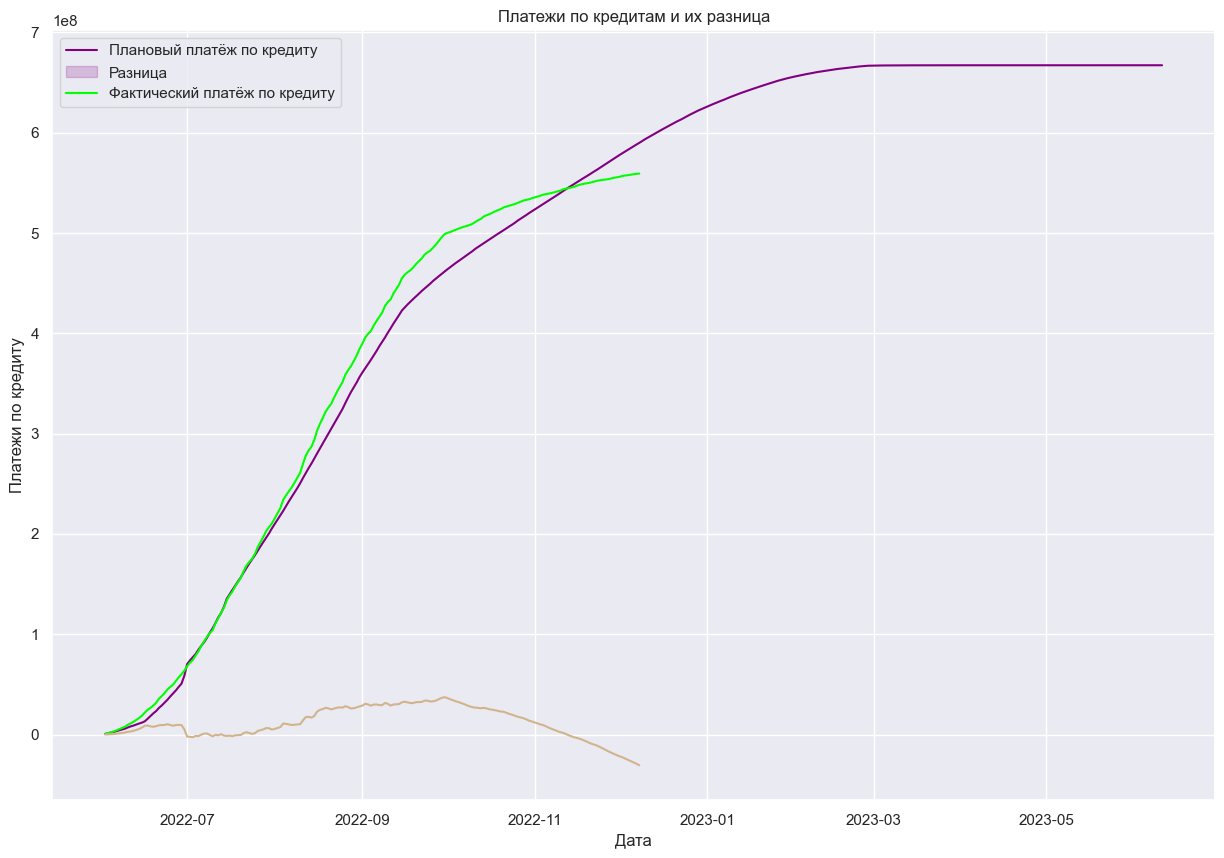

In [32]:
# Строим графики плановой, фактической оплаты по кредитам и их разницы
ax = sns.lineplot(plan_fact_credit, x = 'dates', y = 'plan', color = 'purple')
sns.lineplot(plan_fact_credit, x = 'dates', y = 'fact', color = 'lime', ax = ax)
sns.lineplot(plan_fact_credit, x = 'dates', y = 'difference', color = 'tan', ax = ax)
ax.legend(['Плановый платёж по кредиту', 'Разница', 'Фактический платёж по кредиту'])
ax.set(xlabel='Дата', ylabel='Платежи по кредиту', title='Платежи по кредитам и их разница');

## Выводы

В первые несколько месяцев после взятия кредита наблюдается динамика платить с некоторым запасом - то есть больше текущего платежа по кредиту. Это происходит на протяжении 4-5 месяцев после взятия кредита, потом идёт разворот (приходится на ноябрь 2022 года) и платёжная дисциплина начала хромать, начались просрочки по кредитам. Можно предположить, что это может быть связано или с предстоящими новогодними праздниками или же с общим фактическим снижением реальных доходов населения. В первом случае, это будет временный провал, который должен быть ликвидирован к февралю 2023 года. Во втором случае, это может стать и затяжным спадом.

Как видно из графика более 99% кредитов (по сумме) должны быть закрыты к марту 2023 года. Т.е организации надо задуматься о выдаче новых кредитов или о другом способе оборота своих денежных средств для получения дохода. В любом случае организация отбила свои вложения и уже получила доход свыше 25% от суммы первоначальных вложений.

Для более конкретного и явного анализа мы сохраним итоговую таблицу в виде файла excel и посмотрим на наши данные в PowerBI.

In [34]:
# сохраняем файл в виде excel
file_path = r'C:\Users\USER\Desktop\Программирование\Тестовые задания\11.03.2025\plan_fact_credit.xlsx'
plan_fact_credit.to_excel(file_path, index=False) # index=False чтобы не сохранять индекс dataframe